# <center> **CS 391, Spring 2021, Lab 2**
## <center> Topic: Introduction to pandas, matplotlib, and SciPy

## 1. **pandas**

**pandas** is a Python library that makes many data analysis operations fast and easy.  You will use it frequently in this class.  Let's see how it works.  We can start by importing it and using it to open a CSV file saved on my GitHub.  It contains worldwide data about shark attacks that occured in the past 10 years, which I got from the International Shark Attack File at the Florida Museum:  https://www.floridamuseum.ufl.edu/shark-attacks/trends/location/world/


In [2]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/catabia/cs391_spring21/main/sharks.csv")
data

,year,total,fatal,nonfatal
0,2011,79,13,66
1,2012,83,7,76
2,2013,77,10,67
3,2014,73,3,70
4,2015,98,6,92
5,2016,81,4,77
6,2017,89,5,84
7,2018,68,4,64
8,2019,64,2,62
9,2020,57,10,47


pandas imports CSV files into a **DataFrame**.  DataFrames are composed of rows, which are indexed starting at 0, and columns, each of which is a **Series** object in pandas.  Look at the table above to note the rows and Series in our DataFrame, which we have stored in the variable *data*.  Here's how you can look at the names of the Series:

In [3]:
list(data.columns)

['year', 'total', 'fatal', 'nonfatal']

If you want to know how many rows and columns are in your DataFrame, you can try this:

In [4]:
# (number of rows, number of columns)
data.shape

(10, 4)

Let's say you are interested in selecting just the "fatal" Series (column) in your FataFrame.  You can call it like this:

In [5]:
data.fatal

0    13
1     7
2    10
3     3
4     6
5     4
6     5
7     4
8     2
9    10
Name: fatal, dtype: int64

If you are interested in selecting several columns at once, you can do it like this:

In [6]:
data[['year', 'total']]

,year,total
0,2011,79
1,2012,83
2,2013,77
3,2014,73
4,2015,98
5,2016,81
6,2017,89
7,2018,68
8,2019,64
9,2020,57


You can quickly calculate several summary statstics about one or several columns at once.  Here are a few:

In [7]:
# maximum
data.total.max()

98

In [8]:
# minimum
data[['fatal', 'nonfatal']].min()

fatal        2
nonfatal    47
dtype: int64

In [9]:
# mean
data[['fatal', 'nonfatal', 'total']].mean()

fatal        6.4
nonfatal    70.5
total       76.9
dtype: float64

In [10]:
# variance
data[['fatal', 'nonfatal', 'total']].var()

fatal        12.711111
nonfatal    157.388889
total       145.211111
dtype: float64

In [11]:
# standard deviation
data[['fatal', 'nonfatal', 'total']].std()

fatal        3.565265
nonfatal    12.545473
total       12.050357
dtype: float64

In [12]:
# median
data[['fatal', 'nonfatal', 'total']].median()

fatal        5.5
nonfatal    68.5
total       78.0
dtype: float64

In [13]:
# sum of everything in the column
data.fatal.sum()

64

In [14]:
# a bunch of summary statistics at once!
data.describe()

,year,total,fatal,nonfatal
count,10.00000,10.000000,10.000000,10.000000
mean,2015.50000,76.900000,6.400000,70.500000
std,3.02765,12.050357,3.565265,12.545473
min,2011.00000,57.000000,2.000000,47.000000
25%,2013.25000,69.250000,4.000000,64.500000
50%,2015.50000,78.000000,5.500000,68.500000
75%,2017.75000,82.500000,9.250000,76.750000
max,2020.00000,98.000000,13.000000,92.000000


Say I want to know which years had more than 7 fatal shark attacks.  First, I could generate a column of Booleans (True or False) to answer the question for each year:

In [15]:
# entry will read True if the entry in data.fatal of that row is >7, and False otherwise
data.fatal > 7

0     True
1    False
2     True
3    False
4    False
5    False
6    False
7    False
8    False
9     True
Name: fatal, dtype: bool

I can use that column of Booleans to select only the rows in the DataFrame where fatal >7:

In [16]:
data[data.fatal>7]

,year,total,fatal,nonfatal
0,2011,79,13,66
2,2013,77,10,67
9,2020,57,10,47


Now, let's say you want to know how years there were x number of fatal shark attacks (ie: How many years were there 4 fatal shark attacks? In this dataset, that number is two: 2016 and 2018).  You can group the data by number of fatal attacks, and then count the instances with the .size() method:

In [17]:
by_num_fatal_attacks = data.groupby('fatal').size()
by_num_fatal_attacks

fatal
2     1
3     1
4     2
5     1
6     1
7     1
10    2
13    1
dtype: int64

Note that this method returns a pandas Series.  If you would prefer to return a new DataFrame, do this:

In [18]:
type(by_num_fatal_attacks)

pandas.core.series.Series

If you would prefer to have this information as a Dataframe instead, do this:

In [19]:
by_num_fatal_attacks = data.groupby('fatal').size().to_frame(name='year_count').reset_index()
by_num_fatal_attacks

,fatal,year_count
0,2,1
1,3,1
2,4,2
3,5,1
4,6,1
5,7,1
6,10,2
7,13,1


In [20]:
type(by_num_fatal_attacks)

pandas.core.frame.DataFrame

### **pandas Cheat Sheet**

We have only scratched the surface of the amazing things you can do with pandas.  If you'd like to learn more, this cheat sheet is a great place to begin:  https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

You can also find great resources and materials at the official pandas website as well:  https://pandas.pydata.org/

## 2. **matplotlib**



**matplotlib** is a Python library that will help you make interesting charts, graphs, and plots of your data.  We will be exploring how to use matplotlib throughout the semester.  Today, we will learn how to make bar plots by recreating the shark attack bar chart that Aatish Bhatia made for this blog post:  http://www.empiricalzeal.com/2012/12/21/what-does-randomness-look-like/#more-2450.  But beforehand, let's import the same dataset that he uses.  This shows the number of shark attacks in South Africa from 2000-2011:

In [22]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/catabia/cs391_spring21/main/south_africa_sharks.csv")
df

,year,num_attacks
0,2000,4
1,2001,3
2,2002,3
3,2003,2
4,2004,5
5,2005,4
6,2006,4
7,2007,2
8,2008,0
9,2009,6


Here's how to import matplotlib with ggplot:

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # this makes things pretty!

Let's start by creating a simple bar chart with the years on the x-axis and the number of attacks on the y-axis.

<BarContainer object of 12 artists>

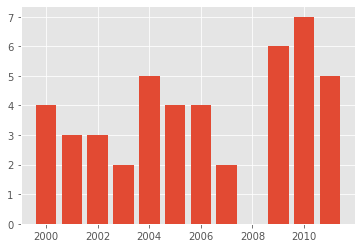

In [25]:
plt.bar(df.year, df.num_attacks)

We can also add a title and axis labels:

Text(0.5, 1.0, 'Shark Attacks in South Africa from 2000-2011')

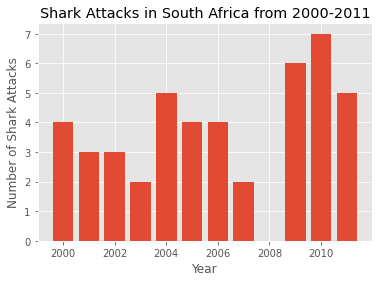

In [26]:
plt.bar(df.year, df.num_attacks)

plt.xlabel("Year")
plt.ylabel("Number of Shark Attacks")
plt.title("Shark Attacks in South Africa from 2000-2011")

We can even add a horizontal line accross the bar chart showing the median number of shark attacks:


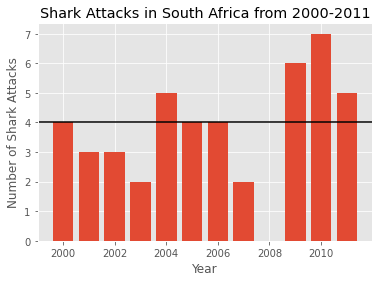

In [27]:
plt.bar(df.year, df.num_attacks)

plt.xlabel("Year")
plt.ylabel("Number of Shark Attacks")
plt.title("Shark Attacks in South Africa from 2000-2011")

plt.axhline(y=df.num_attacks.median(), color='black') # function draws a horizontal line

Now we can try Aatish's bar chart.  Like we did with the previous data set, let's create a DataFrame that counts how many years 0 attacks occured, how many years 1 attack occured, etc:

In [28]:
attack_counts = df.groupby('num_attacks').size().to_frame(name='year_count').reset_index()
attack_counts

,num_attacks,year_count
0,0,1
1,2,2
2,3,2
3,4,3
4,5,2
5,6,1
6,7,1


Here, we create a bar chart with the number of attacks on the x-axis, and the year count on the y axis, and a vertical line at the median number of shark attacks:

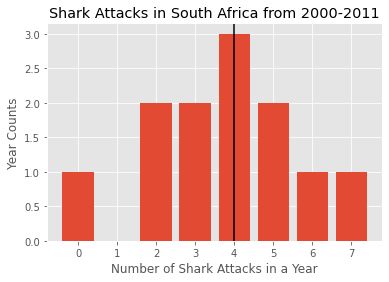

In [29]:
plt.bar(attack_counts.num_attacks, attack_counts.year_count)

plt.xlabel("Number of Shark Attacks in a Year")
plt.ylabel("Year Counts")
plt.title("Shark Attacks in South Africa from 2000-2011")

plt.axvline(x=df.num_attacks.median(), color = 'black') # function draws a vertical line

### **matplotlib Cheat Sheet**

For those who want to learn more:  https://github.com/rougier/matplotlib-cheatsheet

## 3.  **SciPy**

**SciPy** is "a Python-based ecosystem of open-source software for mathematics, science, and engineering." (scipy.org)

There's a lot you can do with SciPy!  Today, we'll go over how to use a few functions for distributions you've talked about in class this week.

### **Binomial distribution**

Calculates the probability of $k$ successes in $n$ trials, when the probability of success is $p$.  It's PMF (probability mass function) is:

$$f(k) = {n \choose k} p^k (1-p)^{n-k}$$


In [30]:
from scipy.stats import binom

# here we set number of trials and the probability of success
n = 10
p =.2
print('n:', n)
print('p:', p)

# calculate the mean and variance
mean = binom.mean(n, p)
print('mean:', mean)
var = binom.var(n, p)
print('var:', var)

# calculate the probability of k=3 successes
k = 3
print('prob of 3 successes:', binom.pmf(k, n, p))

n: 10
p: 0.2
mean: 2.0
var: 1.6
prob of 3 successes: 0.20132659200000022


## **Poisson distribution**

Calculates the probability of $k$ events occuring in a given time frames, given that we know the events occur with a mean rate of $\lambda$, and the events are independent.  Its PMF is:

$$f(k, \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$$

In [31]:
from scipy.stats import poisson

# here we set lambda
l = 5
print('lambda:', l)

# calculate the mean and variance
mean = poisson.mean(l)
print('mean:', mean)
var = poisson.var(l)
print('var:', var)

# calculate the probability of k=3 or k=4 occurences
k = [3, 4]
print('prob of 3 or 4 occurences:', poisson.pmf(k, l))

lambda: 5
mean: 5.0
var: 5.0
prob of 3 or 4 occurences: [0.1403739  0.17546737]


### **Other distributions**
Similar SciPy functions exist for other distributions:
- Normal: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
- Geometric: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html
- Exponential:  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
- And many more! 